In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
rawdata = pd.read_excel('Dataset.xls',sheet_name='Data',)
rawdata.head()

,Ref,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,...,CIFAS_detected,Time_since_most_recent_outstandi,Insurance_Description,PPI,code,prdt_desc,category,PPI_SINGLE,PPI_JOINT,PPI_LCI
0,1,918,A,36,3000.0,14.4,UnSecured,46,8,132,...,N,16,NaN,0,NaN,NaN,NaN,0,0,0
1,3,903,A,120,21000.0,7.9,secured,16,3,288,...,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1
2,4,1060,X,78,7200.0,7.9,secured,17,3,276,...,N,50,Joint,1,719.0,LASCI JOINT,Joint,0,1,0
3,6,839,B,60,8000.0,16.9,UnSecured,47,8,48,...,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1
4,7,1057,X,60,7650.0,7.4,UnSecured,55,10,156,...,N,99,Single,1,718.0,LASCI,Single,1,0,0


In [4]:
rawdata.columns

Index(['Ref', 'Credit_Score', 'Final_Grade', 'Term', 'Net_Advance', 'APR',
       'Loan_Type', 'Mosaic', 'Mosaic_Class', 'Time_at_Address',
       'Residential_Status', 'Telephone_Indicator', 'Number_of_Dependants',
       'Marital_Status', 'Gender', 'Time_in_Employment', 'Employment_Status',
       'Full_Part_Time_Empl_Ind', 'Perm_Temp_Empl_Ind', 'Income_Range',
       'Current_Account', 'ACCESS_Card', 'VISA_Card', 'American_Express',
       'Diners_Card', 'Cheque_Guarantee', 'Other_Credit_Store_Card',
       'Time_with_Bank', 'Value_of_Property', 'Outstanding_Mortgage_Bal',
       'Total_Outstanding_Balances', 'Bureau_Data___Monthly_Other_Co_R',
       'Worst_History_CT', 'Payment_Method', 'Age',
       'Total_outstanding_balance__mortg', 'Total___Public_Info___CCJ____ban',
       'Total_value__Public_Info___CCJ__', 'Time_since_most_recent_Public_In',
       'Total_value__CAIS_8_9s', 'Worst_status_L6m', 'Worst_CUrrent_Status',
       '__of_status_3_s_L6m', 'Searches___Total___L6m', '

In [5]:
rawdata.rename(columns={'Full_Part_Time_Empl_Ind':'Employment_Type',
'Perm_Temp_Empl_Ind':'Permanent_Employee',
'Total___Public_Info___CCJ____ban':'Public_info_CCJ_ban',
'Total_value__Public_Info___CCJ__':'Public_info_CCJ_value',
'Total_value__CAIS_8_9s':'CAIS_8_9_total',
'__of_status_3_s_L6m':'Status_3s_L6m',
}, inplace=True)

### Data Cleaning

In [6]:
categorical_features =[]
for each in rawdata.columns :
    if (rawdata[each].dtype == 'object') and (rawdata[each].nunique() > 2):
        categorical_features.append(each)
categorical_features

['Final_Grade',
 'Residential_Status',
 'Marital_Status',
 'Employment_Status',
 'Payment_Method',
 'Bankruptcy_Detected__SP_',
 'CIFAS_detected',
 'Insurance_Description',
 'prdt_desc',
 'category']

In [7]:
dictt={'TRUE':1,'TRUE ':1,'TRUE  ':1,'FALSE':0,'FALS':0,'FALSE ':0}
rawdata['Current_Account'] = rawdata['Current_Account'].map(dictt)
rawdata['ACCESS_Card'] = rawdata['ACCESS_Card'].map(dictt)
rawdata['VISA_Card'] = rawdata['VISA_Card'].map(dictt)
rawdata['American_Express'] = rawdata['American_Express'].map(dictt)
rawdata['Diners_Card'] = rawdata['Diners_Card'].map(dictt)
rawdata['Cheque_Guarantee'] = rawdata['Cheque_Guarantee'].map(dictt)
rawdata['Other_Credit_Store_Card'] = rawdata['Other_Credit_Store_Card'].map(dictt)

rawdata['Loan_Type'].replace({'secured':1,'UnSecured':0},inplace=True)
rawdata['Loan_Type'].replace({'secured  ':1,'UnSecured':0},inplace=True)
rawdata['Telephone_Indicator'].replace({'Y':1,'N':0},inplace=True)
rawdata['Gender'].replace({'M':1,'F':0},inplace=True)
rawdata['Employment_Type'].replace({'F':1,'P':0},inplace=True)
rawdata['Permanent_Employee'].replace({'P':1,'T':0},inplace=True)

In [8]:
for c in categorical_features:
    print('Unique values for ', c, 'is :', rawdata[c].nunique())

Unique values for  Final_Grade is : 10
Unique values for  Residential_Status is : 4
Unique values for  Marital_Status is : 4
Unique values for  Employment_Status is : 9
Unique values for  Payment_Method is : 3
Unique values for  Bankruptcy_Detected__SP_ is : 3
Unique values for  CIFAS_detected is : 3
Unique values for  Insurance_Description is : 24
Unique values for  prdt_desc is : 15
Unique values for  category is : 4


In [9]:
ppi_data = rawdata.loc[rawdata.PPI==1]
ppi_data.head()

,Ref,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,...,CIFAS_detected,Time_since_most_recent_outstandi,Insurance_Description,PPI,code,prdt_desc,category,PPI_SINGLE,PPI_JOINT,PPI_LCI
1,3,903,A,120,21000.0,7.9,1,16,3,288,...,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1
2,4,1060,X,78,7200.0,7.9,1,17,3,276,...,N,50,Joint,1,719.0,LASCI JOINT,Joint,0,1,0
3,6,839,B,60,8000.0,16.9,0,47,8,48,...,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1
4,7,1057,X,60,7650.0,7.4,0,55,10,156,...,N,99,Single,1,718.0,LASCI,Single,1,0,0
5,8,913,A,120,33000.0,9.4,1,59,11,18,...,N,99,Single,1,715.0,LASU,Single,1,0,0


In [10]:
loancustomers = rawdata.iloc[:,:53]
loancustomers.drop(['Insurance_Description'],inplace=True,axis=1)
encoded_data = pd.get_dummies(loancustomers,columns=categorical_features[:-3])
encoded_data

,Ref,Credit_Score,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,Telephone_Indicator,...,Employment_Status_U,Payment_Method_C,Payment_Method_D,Payment_Method_S,Bankruptcy_Detected__SP__N,Bankruptcy_Detected__SP__T,Bankruptcy_Detected__SP__Y,CIFAS_detected_N,CIFAS_detected_T,CIFAS_detected_Y
0,1,918,36,3000.0,14.4,0,46,8,132,1,...,0,0,1,0,1,0,0,1,0,0
1,3,903,120,21000.0,7.9,1,16,3,288,1,...,0,0,1,0,1,0,0,1,0,0
2,4,1060,78,7200.0,7.9,1,17,3,276,1,...,0,0,1,0,1,0,0,1,0,0
3,6,839,60,8000.0,16.9,0,47,8,48,1,...,0,0,1,0,1,0,0,1,0,0
4,7,1057,60,7650.0,7.4,0,55,10,156,1,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16378,42067,952,60,5000.0,8.9,0,59,11,193,1,...,0,0,1,0,1,0,0,1,0,0
16379,42068,922,60,7500.0,7.9,0,55,10,1,1,...,0,0,1,0,1,0,0,1,0,0
16380,42069,831,60,1000.0,25.9,0,12,2,47,0,...,0,0,1,0,1,0,0,1,0,0
16381,42070,790,36,3000.0,25.9,0,9,2,130,1,...,0,0,1,0,1,0,0,1,0,0


### Handling the inconsistencies.

* Age -ve 
* Time_since_most_recent_outstandi -1 
* Some variables have '99'


In [11]:
encoded_data['Age'] = encoded_data['Age'].apply(lambda x : x if x > 0 else -1*x)
encoded_data['Age'].sort_values()

11421    18
7648     19
7278     19
3820     19
10141    19
         ..
13336    75
14395    75
5100     76
5233     76
4041     77
Name: Age, Length: 16383, dtype: int64

In [12]:
negative_columns=[]
for each in encoded_data.columns:
    if -1 in encoded_data[each].values:
       negative_columns.append(each)

In [13]:
for each in negative_columns:
    encoded_data = encoded_data[encoded_data[each] != -1]
for each in encoded_data.columns:
    if -1 in encoded_data[each].values:
        print(each)

### Splitting into Train and Test

In [14]:
from sklearn.model_selection import train_test_split
y = encoded_data['PPI']
X = encoded_data.drop(['Ref','PPI'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)
X_train.shape

(10971, 79)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
            
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy = np.sum(y_pred == y_test)

In [16]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.6648778682457439


In [17]:
print(confusion_matrix(y_test,y_pred))

[[1127 1189]
 [ 622 2466]]


<BarContainer object of 15 artists>

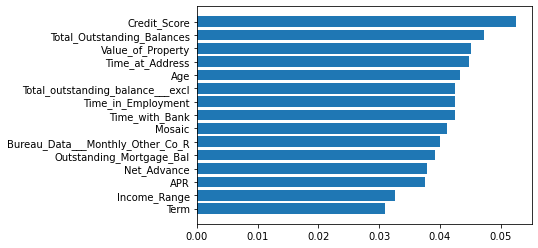

In [18]:
rf.feature_importances_
sorted_idx = rf.feature_importances_.argsort()
x_axis = X.columns[sorted_idx][-15:]
y_axis = rf.feature_importances_[sorted_idx][-15:]
plt.barh(x_axis,y_axis)

# READ THIS !!

Need to plot first 10 variables, top 30% bottom 30% against the count of PPI =1

In [19]:
X.Credit_Score.quantile([0.25,0.75])

0.25    818.0
0.75    947.0
Name: Credit_Score, dtype: float64

Text(0.5, 1.0, 'Effect of Credit Score on PPI Insurance')

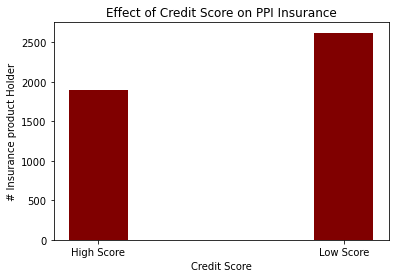

In [62]:
F_stquartile = np.sum(encoded_data.loc[encoded_data['Credit_Score']>=947]['PPI'])
S_stquartile = np.sum(encoded_data.loc[encoded_data['Credit_Score']<=818]['PPI'])
plt.bar(['High Score','Low Score'], [F_stquartile,S_stquartile],color='maroon',width=0.24)
plt.xlabel("Credit Score")
plt.ylabel("# Insurance product Holder")
plt.title("Effect of Credit Score on PPI Insurance")

In [20]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
score = f1_score(y_test, y_pred, average='binary')
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)
print('F-Measure: %.3f' % score)

Precision: 0.675
Recall: 0.799
F-Measure: 0.731


### Checking each feature

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_standard = sc.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_standard,y,test_size=0.33)
lr = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
lr.fit(X_train,y_train)
ypred = lr.predict(X_test)
cm = confusion_matrix(y_test,ypred)
print(cm)
print(f"Accuracy {accuracy_score(y_test,ypred)}")

[[1109 1157]
 [ 614 2524]]
Accuracy 0.6722797927461139


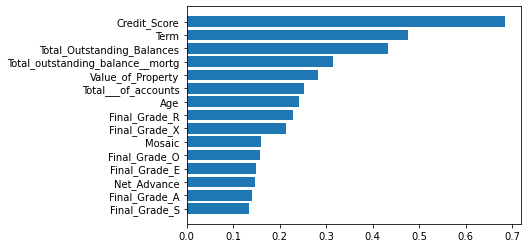

In [22]:
new = abs(lr.coef_[0])
coefficients = pd.DataFrame({"Feature":X.columns.tolist(),"Coefficients":new})
logistic_imp = coefficients.sort_values('Coefficients',ascending=False)[:15]
plt.barh(logistic_imp['Feature'],logistic_imp['Coefficients'])
plt.gca().invert_yaxis()

### Things to Try 

* Cross Validation
* XGBoost /AdaBoost

### Which Category of PPI should we pitch to the customers

In [23]:
! pip install xgboost

You should consider upgrading via the 'C:\Users\pandey\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold

In [25]:
xgbc = XGBClassifier()
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1) 


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_to_onehot=None,
              max_delta_step=0, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=None, monotone_constraints=None,
              n_estimators=100, n_jobs=1, nthread=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, random_state=0, ...)

In [26]:
xgbc.fit(X_train, y_train)
scores = cross_val_score(xgbc, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.65


In [27]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())


K-fold CV average score: 0.66


In [28]:
ypred = xgbc.predict(X_test)
cm = confusion_matrix(y_test,ypred)
print(cm)

[[1250 1016]
 [ 729 2409]]


<BarContainer object of 15 artists>

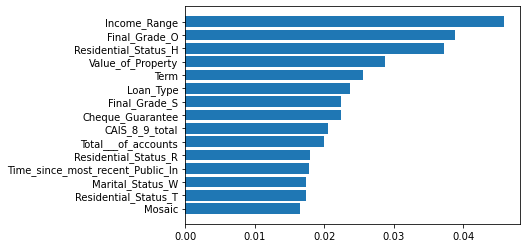

In [29]:
xgbc.feature_importances_
sorted_idx = xgbc.feature_importances_.argsort()
x_axis = X.columns[sorted_idx][-15:]
y_axis = xgbc.feature_importances_[sorted_idx][-15:]
plt.barh(x_axis,y_axis)

---------- x ----------

In [30]:
# Missing Values
for each in ppi_data.columns:
    if np.sum(ppi_data[each].isnull()) > 0 :
        print(each,np.sum(ppi_data[each].isnull()))

code 56
prdt_desc 116


### MultiClass Classification for Identifying Isurance category

In [31]:
for each in ppi_data.columns:
    if ppi_data[each].dtype == 'object':
        print(each)

Final_Grade
Residential_Status
Marital_Status
Employment_Status
Payment_Method
Bankruptcy_Detected__SP_
CIFAS_detected
Insurance_Description
prdt_desc
category


In [32]:
ppi_data['category'].replace({'Joint':'JOINT','Single':'SINGLE'},inplace=True)


c:\Users\pandey\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [33]:
factor = pd.factorize(ppi_data['category'])
ppi_data.category = factor[0]
definitions = factor[1]
print(ppi_data.category.head())
print(definitions)

1    0
2    1
3    0
4    2
5    2
Name: category, dtype: int64
Index(['LCI', 'JOINT', 'SINGLE'], dtype='object')


c:\Users\pandey\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [34]:
ppi_y = ppi_data['category']
ppi_X = ppi_data.drop(['Ref','PPI','Insurance_Description','code','prdt_desc','PPI_SINGLE','PPI_JOINT','PPI_LCI','category'],axis=1)

In [35]:
ppi_X = pd.get_dummies(ppi_X)
pX_train, pX_test, py_train, py_test = train_test_split(ppi_X, ppi_y, test_size = 0.40)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pX_train = scaler.fit_transform(pX_train)
pX_test = scaler.transform(pX_test)

In [37]:
mrf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)
mrf.fit(pX_train,py_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished


RandomForestClassifier(n_jobs=1, verbose=1)

In [38]:
y_pred = mrf.predict(pX_test)
reversefactor = dict(zip(range(3),definitions))
py_test = np.vectorize(reversefactor.get)(py_test)
y_pred = np.vectorize(reversefactor.get)(y_pred)
print(pd.crosstab(py_test, y_pred, rownames=['Actual'], colnames=['Predicted']))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


Predicted  JOINT  LCI  SINGLE
Actual                       
JOINT         18    0     445
LCI            3  160     628
SINGLE         8   56    2467


In [39]:
print(f"Accuracy of the model {accuracy_score(py_test,y_pred)} %")

Accuracy of the model 0.6988110964332893 %


<BarContainer object of 15 artists>

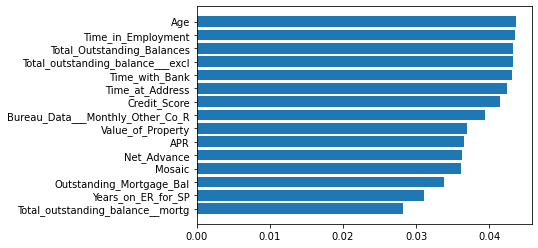

In [40]:
mrf.feature_importances_
sorted_idx = mrf.feature_importances_.argsort()
x_axis = ppi_X.columns[sorted_idx][-15:]
y_axis = mrf.feature_importances_[sorted_idx][-15:]
plt.barh(x_axis,y_axis)